In [23]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [24]:
class BatsmanState(TypedDict):
    balls : int
    runs : int
    fours :int
    sixes : int
    
    strike_rate : float
    balls_per_boundary : float
    boundary_percent : float
    summary:str 

#### Note : Why state is not returned in following finctions
InvalidUpdateError: At key 'balls': Can receive only one value per step. Use an Annotated key to handle multiple values.

it means we are trying to update each element of state simultaneously which is creating problem as these are parallel workflow

to Counter that we do not return state else we do ***partial update***

just a recommendation - always try to do partial updates if possible

In [25]:
def calc_strike_rate(state:BatsmanState):
    strike_rate = (state['runs']/state['balls'])*100
    return {'strike_rate':strike_rate}

In [26]:
def calc_balls_per_boundary(state:BatsmanState):
    balls_per_boundary = state['balls']/(state['fours'] + state['sixes'])
    return {'balls_per_boundary':balls_per_boundary}

In [27]:
def calc_boundary_percent(state:BatsmanState):
    boundary_percent = state['balls']/(state['fours'] + state['sixes'])
    return {'boundary_percent':boundary_percent}

In [28]:
def summarizer(state:BatsmanState)->BatsmanState:
    summary=f"""
    strike rate = {state['strike_rate']}
    balls per boundary = {state['balls_per_boundary']}
    boundary percent = {state['boundary_percent']}
    """
    state[summary]=summary
    return state

In [29]:
graph = StateGraph(BatsmanState)

# ADD NODES
graph.add_node('Calculate_strike_rate',calc_strike_rate)
graph.add_node('Calculate_balls_per_boundary',calc_balls_per_boundary)
graph.add_node('Calculate_boundary_percent',calc_boundary_percent)
graph.add_node('Compile_Summary',summarizer)

# ADD EDGES
graph.add_edge(START,'Calculate_strike_rate')
graph.add_edge(START,'Calculate_balls_per_boundary')
graph.add_edge(START,'Calculate_boundary_percent')

graph.add_edge('Calculate_strike_rate','Compile_Summary')
graph.add_edge('Calculate_balls_per_boundary','Compile_Summary')
graph.add_edge('Calculate_boundary_percent','Compile_Summary')

graph.add_edge('Compile_Summary',END)

# COMPILE
workflow = graph.compile()

In [30]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}
final_state = workflow.invoke(initial_state)

In [35]:
final_state

{'balls': 50,
 'runs': 100,
 'fours': 6,
 'sixes': 4,
 'strike_rate': 200.0,
 'balls_per_boundary': 5.0,
 'boundary_percent': 5.0}

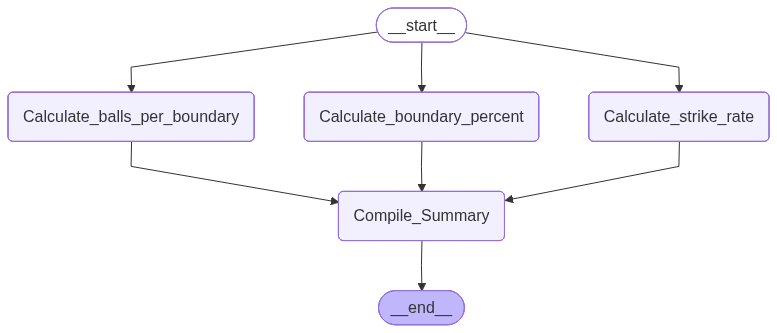

In [34]:
workflow

In [31]:
from IPython.display import Image
print(workflow.get_graph().draw_ascii())

                                                  +-----------+                                                
                                               ***| __start__ |***                                             
                                        *******   +-----------+   *******                                      
                                  ******                 *               *******                               
                           *******                        *                     *******                        
                       ****                               *                            ****                    
+------------------------------+           +----------------------------+           +-----------------------+  
| Calculate_balls_per_boundary |           | Calculate_boundary_percent |           | Calculate_strike_rate |  
+------------------------------+**         +----------------------------+       ****+-------------------